# 로지스틱 회귀, 시그모이드 함수



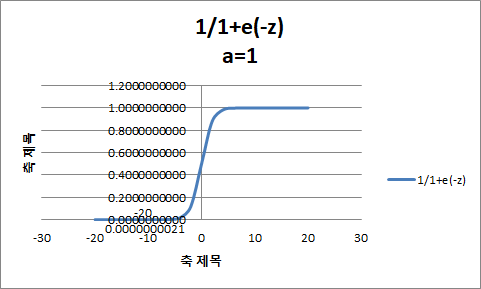     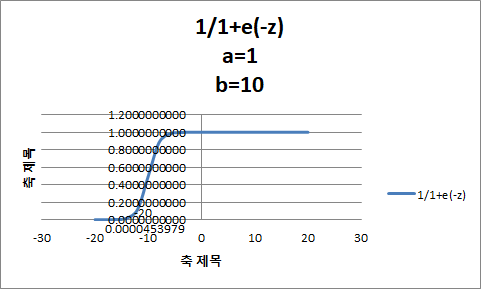

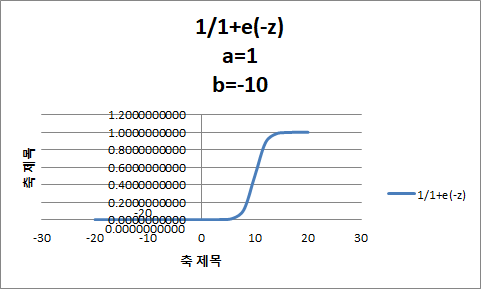      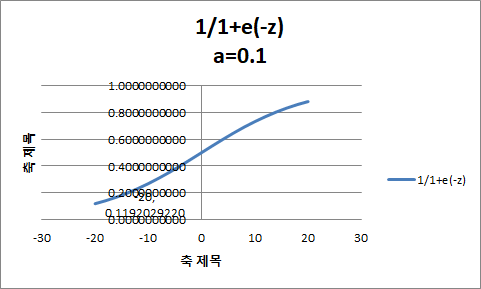


1. H(X) = 1/(1+e^(ax+b))    시그모이드 가설함수

2. a값이 커질수록 경사도가 커짐, b는 그래프의 좌우로 꼬리가 이동

3. a값이 작아지면 오차는 무한대로 커지지만, a값이 커진다고 해서 오차가 무한대로 커지지는 않음, 오히려 a값이 커질수록 오차는 작아짐

4. b값은 너무나 크거나 작을 경우 오차가 무한대로 커짐

5. 로지스틱 회귀에서 비용함수를 평균제곱오차를 사용하여 경사하강법을 사용하면 글로벌미니멈이아닌 로컬미니멈에 빠질수 있음


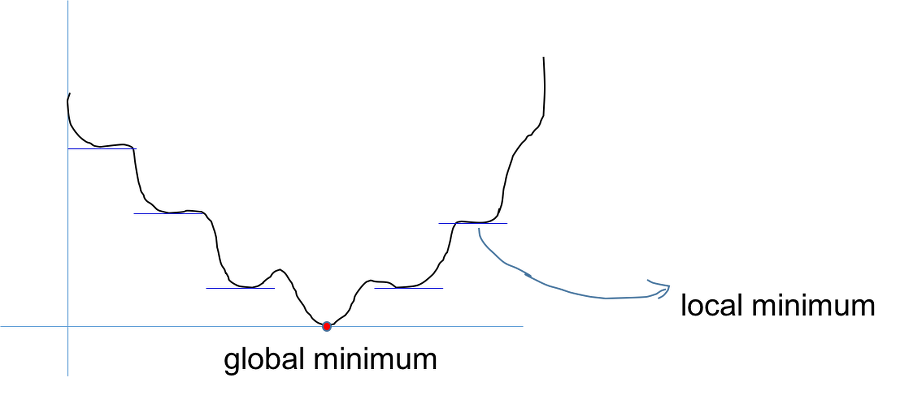https://t1.daumcdn.net/cfile/tistory/275BA84B590DE89D25

non-convex : 여러개의 최솟값 cf)convex:함수 : 하나의 최솟값


6. 시그모이드 함수의 특징은 y값이 0과 1사이에 위치함

7. y값을 0과 1사이에 위치시키기 위해 로그함수를 비용함수로 이용

8. -log(x) if y=1

    -log(1-x) if y=0
    
    
 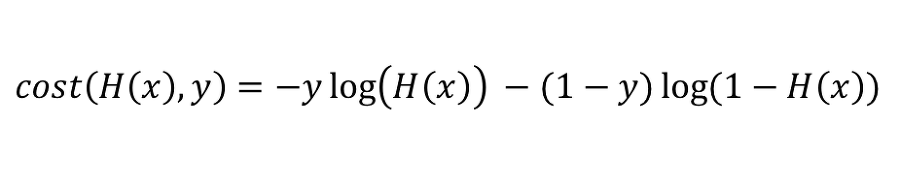
 
 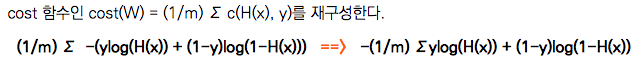

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
data=[[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data=[x_row[0] for x_row in data]
y_data=[y_row[1] for y_row in data]

a=tf.Variable(tf.random_normal([1],dtype=tf.float64,seed=0))
b=tf.Variable(tf.random_normal([1],dtype=tf.float64,seed=0))

In [4]:
#시그모이드 방정식

y=1/(1+np.e**-(a*x_data+b))  #h(X) , 가설함수
y

<tf.Tensor 'truediv:0' shape=(7,) dtype=float64>

In [5]:
#로지스틱의 비용함수
loss=-tf.reduce_mean(np.array(y_data)*tf.log(y)+(1-np.array(y_data))*tf.log(1-y))

learning_rate=0.5

gradient_descent=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(60001):
        sess.run(gradient_descent)
        if i % 6000==0:
            print("Epoch : %.f, loss=%.04f, 기울기 : %.4f,  y 절편 b : %.4f" %(i,sess.run(loss),sess.run(a),sess.run(b)))
            
    #모든 학습 후 최종 파라미터 도출
    a1=sess.run(a)
    b1=sess.run(b)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch : 0, loss=4.0817, 기울기 : 2.4706,  y 절편 b : -0.3620
Epoch : 6000, loss=0.0152, 기울기 : 2.9230,  y 절편 b : -20.3114
Epoch : 12000, loss=0.0081, 기울기 : 3.5648,  y 절편 b : -24.8081
Epoch : 18000, loss=0.0055, 기울기 : 3.9564,  y 절편 b : -27.5511
Epoch : 24000, loss=0.0041, 기울기 : 4.2385,  y 절편 b : -29.5268
Epoch : 30000, loss=0.0033, 기울기 : 4.4590,  y 절편 b : -31.0705
Epoch : 36000, loss=0.0028, 기울기 : 4.6399,  y 절편 b : -32.3371
Epoch : 42000, loss=0.0024, 기울기 : 4.7933,  y 절편 b : -33.4107
Epoch : 48000, loss=0.0021, 기울기 : 4.9263,  y 절편 b : -34.3424
Epoch : 54000, loss=0.0019, 기울기 : 5.0439,  y 절편 b : -35.1653
Epoch : 60000, loss=0.0017, 기울기 : 5.1491,  y 절편 b : -35.9020


In [6]:
a1,b1

(array([5.14910098]), array([-35.90195049]))

In [7]:
#새로운 데이터에 대한 예측
for i in [5,7,13]:
    y=1/(1+np.e**-(a1[0]*i+b1[0]))
    print(y)

3.88235156921752e-05
0.535379863764877
0.9999999999999669


### 텐서플로우의 연산

In [8]:
#tf.constant
x=tf.constant([[1.0,2.0,3.0]])
w=tf.constant([[2.0],[2.0],[2.0]])
y=tf.matmul(x,w)

print(x.get_shape())


sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
result=sess.run(y)

print(result)

(1, 3)
[[12.]]


In [9]:
#tf.Variable
x=tf.Variable([[1.0,2.0,3.0]],dtype=tf.float32)
w=tf.constant([[2.0],[2.0],[2.0]],dtype=tf.float32)
y=tf.matmul(x,w)

print(x.get_shape())


sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
result=sess.run(y)

print(result)

(1, 3)
[[12.]]


In [10]:
#tf.placeholder
input_data=[[1.,2.,3.],[1.,2.,3.],[2.,3.,4.]] 
x=tf.placeholder(dtype=tf.float32,shape=[None,3])
w=tf.Variable([[2.],[2.],[2.]],dtype=tf.float32)
y=tf.matmul(x,w)
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
result=sess.run(y,feed_dict={x:input_data}) #placeholder는 run 하기전에 input_data를 feed 해줘야함

print(result)

[[12.]
 [12.]
 [18.]]


In [11]:
#브로드캐스팅

input_data=[[1,1,1],[2,2,2]]
x=tf.placeholder(dtype=tf.float32,shape=[2,3])
w=tf.Variable([[2],[2],[2]],dtype=tf.float32)
b=tf.Variable([4],dtype=tf.float32)
y=tf.matmul(x,w)+b  #b를 늘려 연산

print(x.get_shape())

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
result=sess.run(y,feed_dict={x:input_data})

print(result)

(2, 3)
[[10.]
 [16.]]


## 다변수 로지스틱

In [44]:
print("predicted=",sess.run(predicted,feed_dict={X:x:data}))

p,val,h_val=sess.run([predicted,y],feed_dict={X:[[1,5],[10,5],[4,5]]})

[[0.85428728]
 [0.97346304]
 [0.99640919]
 [0.9996061 ]
 [0.99994791]
 [0.99999311]
 [0.99999909]]


In [108]:
x_data=np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data=np.array([0,0,0,1,1,1,1]).reshape(7,1)
np.random.seed(0)
tf.set_random_seed(0)

X=tf.placeholder(tf.float64, shape=[None,2])
Y=tf.placeholder(tf.float64, shape=[None,1])
a=tf.Variable(tf.random_uniform([2,1],dtype=tf.float64))
b=tf.Variable(tf.random_uniform([1],dtype=tf.float64))
y=tf.sigmoid(tf.matmul(X,a)+b)


loss=-tf.reduce_mean(Y*tf.log(y)+(1-Y)*tf.log(1-y))
learning_rate=0.1
gradient_decent=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [109]:
predicted=tf.cast(y>0.5,dtype=tf.float64) 
#입력한 값의 결과를 자료형으로 변환
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float64))
#두개가 같으면 1 다르면 0으로 return
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3001):
        a_,b_,loss_,_=sess.run([a,b,loss,gradient_decent],
                              feed_dict={X:x_data,Y:y_data})
        if (i+1)%300==0:
            print('step: %d,a1= %.4f,a2= %.4f,b= %.4f,loss= %.4f'%
                 (i+1,a_[0],a_[1],b_,loss_))
    print('predicted=',sess.run(predicted,feed_dict={X:x_data}))

    p_val,h_val=sess.run([predicted,y],feed_dict={X:[[1,5],[10,5],[4,5]]})
    print('check predicted = ',p_val)
    print('check hypothests = ',h_val)

    h,c,a=sess.run([y,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print('\nHypothesis: ',h,'\nCorrect (Y):',c,'\nAccuracy: ',a)
    
    print("predicted=",sess.run(predicted,feed_dict={X:x_data}))

    p_val,h_val=sess.run([predicted,y],feed_dict={X:[[1,5],[10,5],[4,5]]})
    
    print("check predicted=",p_val)
    print("check hypotgesis=",h_val)

    h,c,a=sess.run([y,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print("\nhypothesis : ",h, "\nCorrect : ",c, "\naccuracy : ", a)

step: 300,a1= 0.8849,a2= -0.6685,b= -2.3396,loss= 0.2728
step: 600,a1= 0.8631,a2= -0.3649,b= -3.8174,loss= 0.1957
step: 900,a1= 0.7634,a2= -0.0216,b= -4.8921,loss= 0.1527
step: 1200,a1= 0.6535,a2= 0.2953,b= -5.7428,loss= 0.1247
step: 1500,a1= 0.5501,a2= 0.5760,b= -6.4480,loss= 0.1051
step: 1800,a1= 0.4574,a2= 0.8227,b= -7.0505,loss= 0.0906
step: 2100,a1= 0.3754,a2= 1.0398,b= -7.5767,loss= 0.0796
step: 2400,a1= 0.3031,a2= 1.2320,b= -8.0438,loss= 0.0709
step: 2700,a1= 0.2393,a2= 1.4033,b= -8.4638,loss= 0.0639
step: 3000,a1= 0.1828,a2= 1.5572,b= -8.8453,loss= 0.0581
predicted= [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted =  [[0.]
 [1.]
 [0.]]
check hypothests =  [[0.29410998]
 [0.68303181]
 [0.41878646]]

Hypothesis:  [[0.0217042 ]
 [0.03097408]
 [0.17941983]
 [0.87656174]
 [0.97982883]
 [0.99699953]
 [0.99956024]] 
Correct (Y): [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0
predicted= [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted= [[0.]
 [1.]
 [0.]]

## 당뇨 데이터

In [110]:
dt=np.loadtxt("data-03-diabetes.csv",delimiter=",",dtype=np.float32)

In [111]:
x_data=dt[:,0:-1]
y_data=dt[:,[-1]]

In [112]:
x_data.shape

(759, 8)

In [113]:
#Placeholders : Shape 주의! 총 8개의 x_data와 1개의 y_data

X=tf.placeholder(dtype=tf.float32,shape=[None,8]) #들어오는 데이터가 몇개인지는 모르지만, 피처는 8개로 확실함
Y=tf.placeholder(dtype=tf.float32,shape=[None,1])

W=tf.Variable(tf.random_normal([8,1]),name="weight") #X 변수 개수만큼의 W
b=tf.Variable(tf.random_normal([1]),name="bias")

In [114]:
hypothesis=tf.sigmoid(tf.matmul(X,W)+b) #로지스틱의 가설함수 (시그모이드)
cost=-tf.reduce_mean(Y*(tf.log(hypothesis))+(1-Y)*(tf.log(1-hypothesis))) #손실함수 

In [117]:
train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#가설함수가 0.5보다 크면 1
predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)

#정확도 : 예측값과 실제 Y를 동등한지 비교하여 평균을 구함
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32)) 



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val,_=sess.run([cost,train],feed_dict={X:x_data,Y:y_data})
        if step%200==0:
            print(step,cost_val)
         
        
        
    hy,pre,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print("Accuracy : ",a)

0 0.6752674
200 0.65196586
400 0.6354216
600 0.62137485
800 0.6090455
1000 0.5981442
1200 0.5884726
1400 0.5798662
1600 0.5721844
1800 0.5653062
2000 0.5591281
2200 0.5535615
2400 0.54853004
2600 0.5439683
2800 0.5398205
3000 0.5360376
3200 0.53257847
3400 0.52940667
3600 0.52649087
3800 0.5238039
4000 0.52132183
4200 0.5190241
4400 0.5168922
4600 0.5149102
4800 0.5130641
5000 0.5113411
5200 0.5097306
5400 0.5082222
5600 0.50680745
5800 0.50547826
6000 0.50422794
6200 0.5030498
6400 0.5019382
6600 0.5008884
6800 0.49989522
7000 0.49895492
7200 0.49806353
7400 0.49721748
7600 0.4964136
7800 0.49564898
8000 0.4949211
8200 0.4942275
8400 0.4935661
8600 0.49293453
8800 0.4923312
9000 0.49175417
9200 0.4912021
9400 0.49067324
9600 0.49016643
9800 0.48968014
10000 0.4892135
Accuracy :  0.76943344
